Exploratory Data Analysis for CMAPSS - RUL

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
print('libraries imported')

libraries imported


In [2]:
col_names = ['unit_number', 'time_in_cycles', 'op_setting_1', 'op_setting_2', 'op_setting_3'] + \
            [f'sensor{i}' for i in range(1,22)]

df = pd.read_csv('D:/My Projects/Predictive Maintainability RUL/artifacts/raw/train_FD001.txt', sep = '\s+', header=None, names=col_names)
df.head()

,unit_number,time_in_cycles,op_setting_1,op_setting_2,op_setting_3,sensor1,sensor2,sensor3,sensor4,sensor5,...,sensor12,sensor13,sensor14,sensor15,sensor16,sensor17,sensor18,sensor19,sensor20,sensor21
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20631 entries, 0 to 20630
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   unit_number     20631 non-null  int64  
 1   time_in_cycles  20631 non-null  int64  
 2   op_setting_1    20631 non-null  float64
 3   op_setting_2    20631 non-null  float64
 4   op_setting_3    20631 non-null  float64
 5   sensor1         20631 non-null  float64
 6   sensor2         20631 non-null  float64
 7   sensor3         20631 non-null  float64
 8   sensor4         20631 non-null  float64
 9   sensor5         20631 non-null  float64
 10  sensor6         20631 non-null  float64
 11  sensor7         20631 non-null  float64
 12  sensor8         20631 non-null  float64
 13  sensor9         20631 non-null  float64
 14  sensor10        20631 non-null  float64
 15  sensor11        20631 non-null  float64
 16  sensor12        20631 non-null  float64
 17  sensor13        20631 non-null 

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
unit_number,20631.0,51.506568,2.922763e+01,1.0000,26.0000,52.0000,77.0000,100.0000
time_in_cycles,20631.0,108.807862,6.888099e+01,1.0000,52.0000,104.0000,156.0000,362.0000
op_setting_1,20631.0,-0.000009,2.187313e-03,-0.0087,-0.0015,0.0000,0.0015,0.0087
op_setting_2,20631.0,0.000002,2.930621e-04,-0.0006,-0.0002,0.0000,0.0003,0.0006
op_setting_3,20631.0,100.000000,0.000000e+00,100.0000,100.0000,100.0000,100.0000,100.0000
sensor1,20631.0,518.670000,0.000000e+00,518.6700,518.6700,518.6700,518.6700,518.6700
sensor2,20631.0,642.680934,5.000533e-01,641.2100,642.3250,642.6400,643.0000,644.5300
sensor3,20631.0,1590.523119,6.131150e+00,1571.0400,1586.2600,1590.1000,1594.3800,1616.9100
sensor4,20631.0,1408.933782,9.000605e+00,1382.2500,1402.3600,1408.0400,1414.5550,1441.4900
sensor5,20631.0,14.620000,1.776400e-15,14.6200,14.6200,14.6200,14.6200,14.6200


In [5]:
df.isnull().sum()

unit_number       0
time_in_cycles    0
op_setting_1      0
op_setting_2      0
op_setting_3      0
sensor1           0
sensor2           0
sensor3           0
sensor4           0
sensor5           0
sensor6           0
sensor7           0
sensor8           0
sensor9           0
sensor10          0
sensor11          0
sensor12          0
sensor13          0
sensor14          0
sensor15          0
sensor16          0
sensor17          0
sensor18          0
sensor19          0
sensor20          0
sensor21          0
dtype: int64

In [6]:
print('Total_engines:', df['unit_number'].nunique())
df.groupby('unit_number')['time_in_cycles'].max().describe()

Total_engines: 100


count    100.000000
mean     206.310000
std       46.342749
min      128.000000
25%      177.000000
50%      199.000000
75%      229.250000
max      362.000000
Name: time_in_cycles, dtype: float64

In [7]:
rul_df = df.groupby('unit_number')['time_in_cycles'].max().reset_index()
rul_df.columns = ['unit_number', 'max_cycle']

df = df.merge(rul_df, on='unit_number', how='left')
df['RUL'] = df['max_cycle'] - df['time_in_cycles']
df.drop('max_cycle', axis = 1, inplace=True)

df[['unit_number', 'time_in_cycles', 'RUL']].head()

,unit_number,time_in_cycles,RUL
0,1,1,191
1,1,2,190
2,1,3,189
3,1,4,188
4,1,5,187


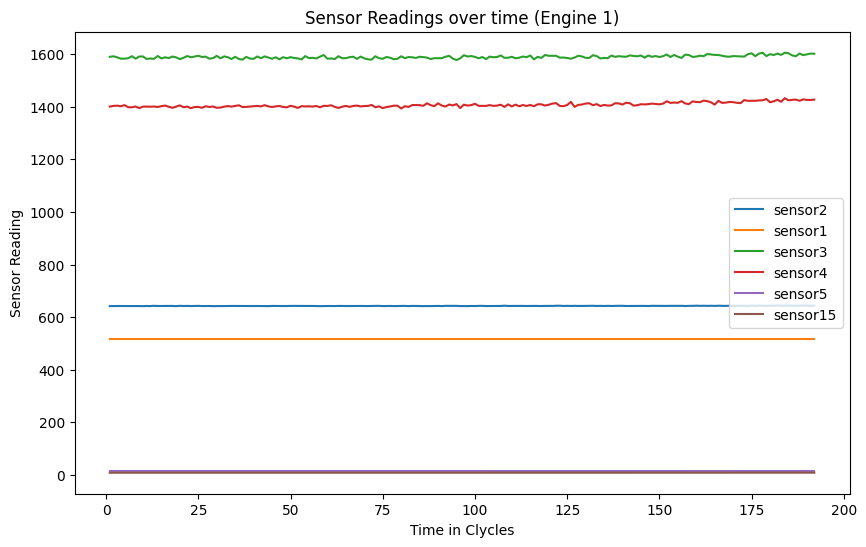

In [8]:
plt.figure(figsize=(10,6))
for sensor in ['sensor2', 'sensor1', 'sensor3', 'sensor4', 'sensor5', 'sensor15']:
    plt.plot(df[df['unit_number']==1]['time_in_cycles'], df[df['unit_number']==1][sensor], label=sensor)

plt.title('Sensor Readings over time (Engine 1)')
plt.xlabel('Time in Clycles')
plt.ylabel('Sensor Reading')
plt.legend()
plt.show()

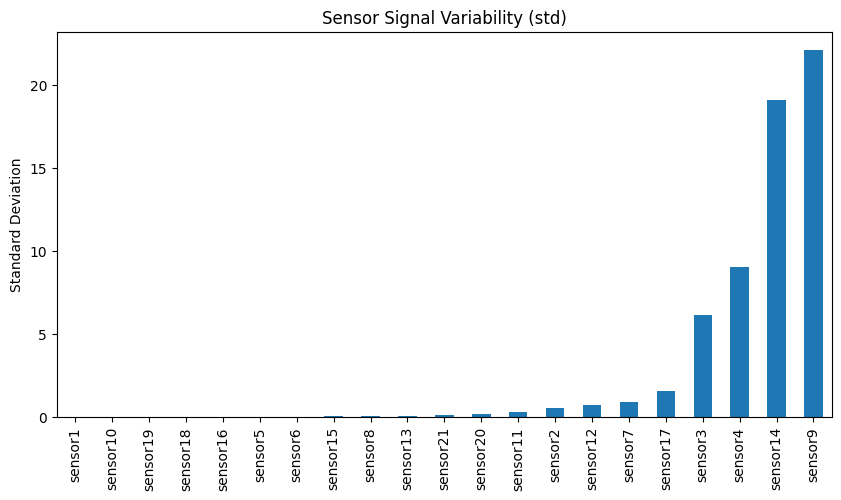

In [9]:
sensor_cols = [col for col in df.columns if 'sensor' in col]
sensor_std = df[sensor_cols].std().sort_values()

plt.figure(figsize=(10,5))
sensor_std.plot(kind='bar')
plt.title('Sensor Signal Variability (std)')
plt.ylabel('Standard Deviation')
plt.show()

Sensors with very low std may not be useful for modeling. Probably, sensor13, sensor21, sensor20, sensor11, sensor2, sensor12, sensor7, sensor17, sensor3, sensor4, sensor14, sensor9.

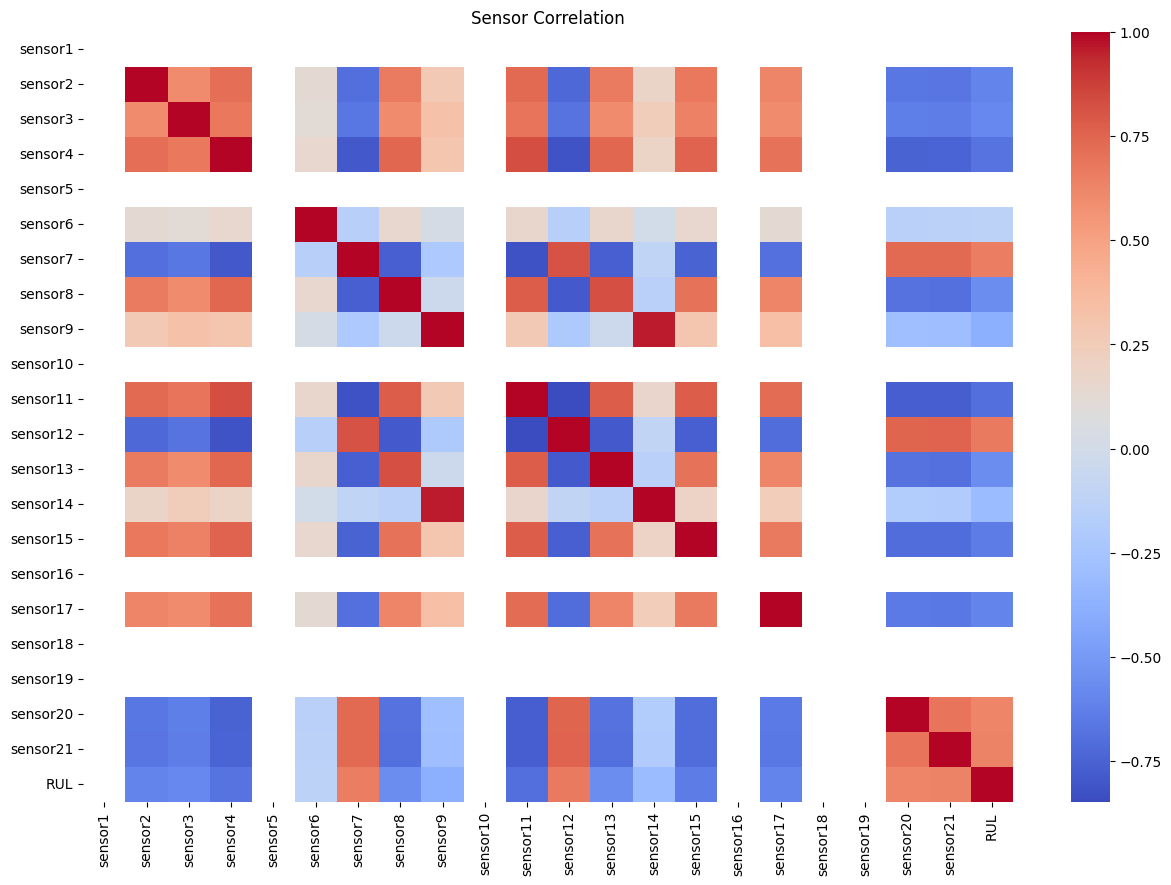

In [10]:
plt.figure(figsize=(15,10))
corr = df[sensor_cols + ['RUL']].corr()
sns.heatmap(corr, cmap='coolwarm', annot=False)
plt.title('Sensor Correlation')
plt.show()

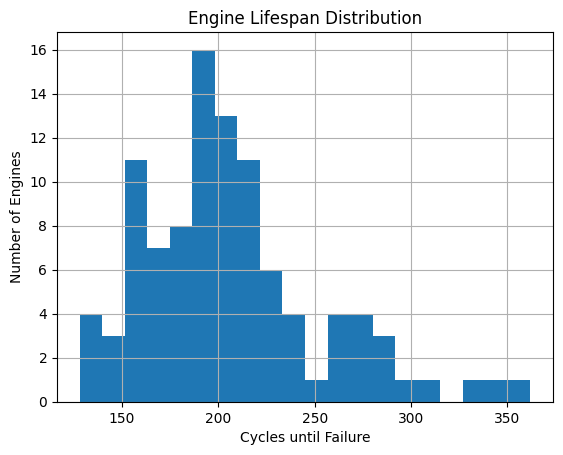

In [11]:
df.groupby('unit_number')['time_in_cycles'].max().hist(bins=20)
plt.title('Engine Lifespan Distribution')
plt.xlabel('Cycles until Failure')
plt.ylabel('Number of Engines')
plt.show()

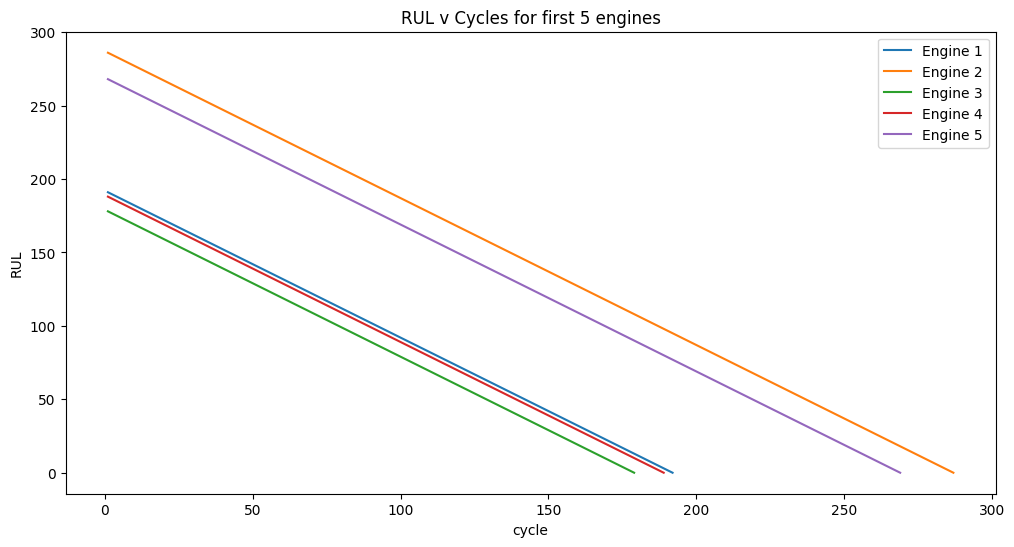

In [12]:
#RUL across different units

plt.figure(figsize=(12,6))
for i in range(1,6):
    temp = df[df['unit_number'] == i]
    plt.plot(temp['time_in_cycles'], temp['RUL'], label = f'Engine {i}')

plt.xlabel('cycle')
plt.ylabel('RUL')
plt.title('RUL v Cycles for first 5 engines')
plt.legend()
plt.show()


In [16]:
for col in sensor_cols:
    if df[col].std() < 1e-5:
        print(f'{col} has near zero variance and can be dropped')

sensor1 has near zero variance and can be dropped
sensor5 has near zero variance and can be dropped
sensor10 has near zero variance and can be dropped
sensor16 has near zero variance and can be dropped
sensor18 has near zero variance and can be dropped
sensor19 has near zero variance and can be dropped


In [17]:
df.columns

Index(['unit_number', 'time_in_cycles', 'op_setting_1', 'op_setting_2',
       'op_setting_3', 'sensor1', 'sensor2', 'sensor3', 'sensor4', 'sensor5',
       'sensor6', 'sensor7', 'sensor8', 'sensor9', 'sensor10', 'sensor11',
       'sensor12', 'sensor13', 'sensor14', 'sensor15', 'sensor16', 'sensor17',
       'sensor18', 'sensor19', 'sensor20', 'sensor21', 'RUL', 'RUL_bin'],
      dtype='object')